# Barn og kropp

Barn og kropp, forskjeller. 
* hvilke kroppsdeler voksen vs. barn
* bruk av pronomen, possessiver

In [10]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
mu.update('mods_meta')
import mods_meta as mm
mu.update('collocations')
import collocations as coll
import pandas as pd

Updated file `D:\Documents\GitHub\Miscellaneous-Notebooks\Barn_kropp_Uri\mods_meta.py`

Updated file `D:\Documents\GitHub\Miscellaneous-Notebooks\Barn_kropp_Uri\collocations.py`

In [4]:
corpus = mm.meta_natbib(children=True, yearfrom=2010, yearto=2020, limit=10000)

In [5]:
len(corpus)

6595

In [7]:
corpus_urns = [u[1] for u in corpus]

In [14]:
%time corpus_meta = pd.concat([nb.frame(mm.metadata(corpus_urns[i:i+1000])) for i in range(0, len(corpus_urns), 1000)], sort=False)

Wall time: 6min 30s


In [28]:
tot = nb.frame(nb.totals(50000), 'tot')
nb.normalize_corpus_dataframe(tot)

True

In [16]:
corpus_meta.to_csv('barnekorpus.csv')

In [22]:
sytten = [x for x in corpus_urns if str(x).startswith('2017')]

In [39]:
sytten_text = nb.get_corpus_text(sytten)

In [78]:
corpus_agg = pd.concat([nb.get_aggregated_corpus(corpus_urns[i:i+500]) for i in range(0, len(corpus_urns),500)], sort=False).sum(axis = 1)

In [93]:
corpus_sum = corpus_agg.groupby(corpus_agg.index).sum()

In [94]:
corpus_sum.to_csv('barnekorpus_aggregert.csv')

In [97]:
corpus_sum.loc[['hans',"hennes"]]

,0
hans,221508
hennes,151939


In [82]:
corpus_agg = nb.frame(corpus_agg)

In [126]:
nb.normalize_corpus_dataframe(corpus_sum)

True

In [50]:
sytten_sum = nb.frame(sytten_text.sum(axis = 1))

In [156]:
def relatert(w):
    try:
        res = nb.relaterte_ord(w)
    except:
        res = []
    return res

In [185]:
kroppsord = """håret neglene neglen hendene øynene øyet øyenvippene øyenbrynene ansiktet pannen hodet halsen nakken skulderen skuldrene magen brystet brystene
fingrene tommelen ankelen foten tærne tåen tåa rumpa rumpen lårene leggene knærne kneet armen hånden albuen fingeren lemmet kjønnet""".split()

In [186]:
kroppsord

['håret',
 'neglene',
 'neglen',
 'hendene',
 'øynene',
 'øyet',
 'øyenvippene',
 'øyenbrynene',
 'ansiktet',
 'pannen',
 'hodet',
 'halsen',
 'nakken',
 'skulderen',
 'skuldrene',
 'magen',
 'brystet',
 'brystene',
 'fingrene',
 'tommelen',
 'ankelen',
 'foten',
 'tærne',
 'tåen',
 'tåa',
 'rumpa',
 'rumpen',
 'lårene',
 'leggene',
 'knærne',
 'kneet',
 'armen',
 'hånden',
 'albuen',
 'fingeren',
 'lemmet',
 'kjønnet']

In [187]:
nb.frame_sort(corpus_sum.loc[kroppsord])

,0
hodet,7.210415e-04
øynene,5.576011e-04
ansiktet,3.814787e-04
hånden,3.672715e-04
hendene,3.004404e-04
håret,2.008579e-04
armen,1.800405e-04
skuldrene,1.614365e-04
halsen,1.496280e-04
magen,1.360309e-04


In [189]:
def coll(w, before = 3, after = 3, corpus=corpus_urns, step = 500):
    return pd.concat([nb.urn_coll(w, urns = corpus_urns[i:i+step], after = after, before= before) for i in range(0, len(corpus_urns), step)], sort=False, axis = 1).sum(axis=1)

In [ ]:
from time import time

In [208]:
t = time()
colls_bigram = dict()
step = 50
for w in  kroppsord:
    print(w)
    colls_bigram[w] = coll(w, after = 1, before= 0, step = step) 
    print(time() - t)
    t = time()

håret
23.98107123374939
neglene
23.72041964530945
neglen
28.412723779678345
hendene
713.3346123695374
øynene
23.784382581710815
øyet
107.17365097999573
øyenvippene
26.92259168624878
øyenbrynene
59.50891423225403
ansiktet
771.3574068546295
pannen
305.52407336235046
hodet
313.1916904449463
halsen
399.87607407569885
nakken
163.22336435317993
skulderen
312.67498803138733
skuldrene
251.53100681304932
magen
339.83343839645386
brystet
292.46927309036255
brystene
29.707000017166138
fingrene
249.54613590240479
tommelen
132.15135073661804
ankelen
84.42665433883667
foten
242.13348197937012
tærne
24.193140029907227
tåen
37.472545862197876
tåa
28.72255516052246
rumpa
24.05023193359375
rumpen
23.726415395736694
lårene
82.79661202430725
leggene
54.5127911567688
knærne
212.92896175384521
kneet
63.13984990119934
armen
254.91405749320984
hånden
309.8036320209503
albuen
139.41318345069885
fingeren
81.12455487251282
lemmet
23.56450891494751
kjønnet
152.4047601222992


In [272]:
t = time()
colls_preceding = dict()
step = 50
for w in  kroppsord:
    print(w)
    colls_preceding[w] = coll(w, after = 0, before= 10, step = step) 
    print(time() - t)
    t = time()

håret
26.34691619873047
neglene
25.80622673034668
neglen
23.9682776927948
hendene
46.89315104484558
øynene
53.267504930496216
øyet
28.111905813217163
øyenvippene
23.972274780273438
øyenbrynene
25.685292720794678
ansiktet
46.23353052139282
pannen
33.226978063583374
hodet
62.673113107681274
halsen
36.20327401161194
nakken
29.086347103118896
skulderen
34.45927119255066
skuldrene
36.64502024650574
magen
36.88688063621521
brystet
32.3484787940979
brystene
24.448004245758057
fingrene
31.857266902923584
tommelen
26.082068920135498
ankelen
25.12061619758606
foten
91.45264267921448
tærne
26.396886110305786
tåen
23.92929983139038
tåa
84.61455631256104
rumpa
27.33934783935547
rumpen
23.639464855194092
lårene
24.997689723968506
leggene
24.951714038848877
knærne
28.87546730041504
kneet
26.495832204818726
armen
39.78422212600708
hånden
42.50666356086731
albuen
85.57578921318054
fingeren
30.085775136947632
lemmet
26.103070735931396
kjønnet
24.31008267402649


In [273]:
colls_pre = nb.frame(colls_preceding).transpose()
colls_pre.to_csv('colls_preceding.csv')

In [209]:
bi_colls = nb.frame(colls_bigram).transpose()

In [215]:
bi_colls.to_csv('bicolls_after1_before0.csv')

In [226]:
bi_colls.loc[[w for w in 'hans hennes min mitt mine din ditt dine vår våre vårt'.split() if w in bi_colls.index]].transpose().fillna(0).style.background_gradient(axis=1)

,hans,hennes,min,mitt,mine,din,ditt,dine,vår,våre,vårt
håret,0.0505703,0.0753194,0,0.0670399,0,0,0.0172737,0,0,0,0.00116151
neglene,0.0195599,0.0601467,0,0,0.0508557,0,0,0.0220049,0,0.00537897,0
neglen,0.0102041,0.0170068,0.047619,0,0,0.00340136,0,0,0,0,0
hendene,0.0436246,0.0286317,0,0,0.0443812,1.99108e-05,0,0.00661039,0,0.00519672,0
øynene,0.07146,0.0507118,1.07281e-05,0,0.0275927,0,0,0.006984,0,0.00254256,0
øyet,0.0497729,0.0207084,0,0.0290645,0,0.000181653,0.0150772,0,0,0,0.00108992
øyenvippene,0.0590278,0.0833333,0,0,0.0173611,0,0,0.0173611,0,0,0
øyenbrynene,0.0315749,0.0146323,0.00038506,0,0.00808625,0,0,0.00231036,0,0,0
ansiktet,0.128507,0.0867636,0,0.0647159,0,1.56811e-05,0.00931458,0,0,0,0.000203854
pannen,0.0442683,0.0249752,0.0127519,0,0,0.00290717,0,0,6.6072e-05,0,0


In [225]:
nb.normalize_corpus_dataframe(bi_colls)

True

In [216]:
genitives = corpus_sum.loc['hans hennes min mitt mine din ditt dine vår våre vårt'.split()]

In [274]:
pronouns = corpus_sum.loc['han hun vi de jeg du'.split()]

In [275]:
pronouns

,0
han,0.008149
hun,0.005477
vi,0.003073
de,0.005488
jeg,0.009295
du,0.005304


In [276]:
pron_colls = colls_pre.loc[[w for w in pronouns.index if w in colls_pre.index]]

In [295]:
pron_colls.transpose().fillna(0).style.background_gradient(axis=1)

,han,hun,vi,de,jeg,du
håret,2630,2862,276,1052,2364,1008
neglene,121,200,28,337,160,78
neglen,20,24,1,3,33,11
hendene,5638,4028,696,3978,4164,1329
øynene,9121,8086,889,12146,9548,2537
øyet,494,244,61,152,341,155
øyenvippene,17,29,2,96,23,6
øyenbrynene,263,193,51,328,239,107
ansiktet,6362,4875,451,1825,5407,1232
pannen,1515,1044,180,366,1055,526


In [224]:
genitives

,0
hans,0.001325
hennes,0.000909
min,0.000914
mitt,0.000495
mine,0.000443
din,0.000534
ditt,0.000174
dine,0.000162
vår,0.000234
våre,0.000150


In [233]:
gen_colls = bi_colls.loc[[w for w in 'hans hennes min mitt mine din ditt dine vår våre vårt'.split() if w in bi_colls.index]]

In [241]:
genitives

,0
hans,0.001325
hennes,0.000909
min,0.000914
mitt,0.000495
mine,0.000443
din,0.000534
ditt,0.000174
dine,0.000162
vår,0.000234
våre,0.000150


In [282]:
nb.normalize_corpus_dataframe(gen_colls)

True

In [283]:
gen_colls.div(genitives[0], axis=0).transpose().style.background_gradient(axis=1)

,hans,hennes,min,mitt,mine,din,ditt,dine,vår,våre,vårt
håret,180.562,392.065,0,640.482,0,0,468.67,0,0,0,57.783
neglene,93.459,418.973,0,0,726.491,0,0,857.782,0,226.48,0
neglen,98.4367,239.181,666.167,0,0,81.3877,0,0,0,0,0
hendene,256.278,245.216,0,0,779.498,0.29013,0,316.819,0,269.021,0
øynene,338.537,350.245,0.0737031,0,390.817,0,0,269.93,0,106.143,0
øyet,324.111,196.593,0,506.414,0,2.93404,746.057,0,0,0,98.8874
øyenvippene,251.56,517.755,0,0,221.207,0,0,603.625,0,0,0
øyenbrynene,418.134,282.492,7.39471,0,320.152,0,0,249.607,0,0,0
ansiktet,334.973,329.718,0,451.376,0,0.101388,184.501,0,0,0,7.40375
pannen,393.185,323.396,164.248,0,0,64.047,0,0,3.32244,0,0


In [317]:
gender_collocations = gen_colls.div(genitives[0], axis=0).transpose()
gender_collocations

,hans,hennes,min,mitt,mine,din,ditt,dine,vår,våre,vårt
håret,180.562003,392.064626,0.000000,640.482374,0.000000,0.000000,468.670404,0.000000,0.000000,0.000000,57.783016
neglene,93.458962,418.973182,0.000000,0.000000,726.490574,0.000000,0.000000,857.782262,0.000000,226.479875,0.000000
neglen,98.436668,239.180519,666.167212,0.000000,0.000000,81.387745,0.000000,0.000000,0.000000,0.000000,0.000000
hendene,256.278104,245.215638,0.000000,0.000000,779.497769,0.290130,0.000000,316.818691,0.000000,269.020641,0.000000
øynene,338.536664,350.245070,0.073703,0.000000,390.816529,0.000000,0.000000,269.929811,0.000000,106.142813,0.000000
øyet,324.110699,196.592891,0.000000,506.414109,0.000000,2.934041,746.056562,0.000000,0.000000,0.000000,98.887405
øyenvippene,251.560373,517.755477,0.000000,0.000000,221.207066,0.000000,0.000000,603.624555,0.000000,0.000000,0.000000
øyenbrynene,418.134133,282.491586,7.394713,0.000000,320.152388,0.000000,0.000000,249.606911,0.000000,0.000000,0.000000
ansiktet,334.973285,329.717529,0.000000,451.376237,0.000000,0.101388,184.500911,0.000000,0.000000,0.000000,7.403746
pannen,393.185341,323.395868,164.247737,0.000000,0.000000,64.046966,0.000000,0.000000,3.322443,0.000000,0.000000


In [285]:
pron_colls.div(pronouns[0], axis=0).transpose().fillna(0).style.background_gradient(axis=1)

,han,hun,vi,de,jeg,du
håret,322744,522522,89801.9,191684,254336,190045
neglene,14848.7,36514.5,9110.34,61404.6,17213.9,14705.9
neglen,2454.33,4381.73,325.369,546.628,3550.38,2073.91
hendene,691875,735401,226457,724829,447993,250566
øynene,1.1193e+06,1.47628e+06,289253,2.21312e+06,1.02724e+06,478319
øyet,60621.9,44547.6,19847.5,27695.8,36687.2,29223.2
øyenvippene,2086.18,5294.6,650.739,17492.1,2474.5,1131.22
øyenbrynene,32274.4,35236.4,16593.8,59764.7,25713.3,20173.5
ansiktet,780722,890040,146742,332532,581724,232278
pannen,185915,190605,58566.5,66688.7,113504,99170.5


In [261]:
genderframe = gen_colls.loc[['hans','hennes']].div(genitives.loc[['hans','hennes']][0], axis=0).transpose()

In [288]:
pronounframe = pron_colls.loc[['han','hun']].div(pronouns.loc[['han','hun']][0], axis=0).transpose()

In [262]:
genderframe['gender'] = genderframe['hans']/genderframe['hennes']

In [290]:
pronounframe['gender'] = pronounframe['han']/pronounframe['hun']

In [211]:
bi_colls.to_csv('bi_colls.csv')

In [293]:
pronounframe.sort_values(by='gender').style.applymap(lambda x: color_gender(x, 0.3), subset = ['gender'])

,han,hun,gender
kjønnet,122.716,547.717,0.224051
øyenvippene,2086.18,5294.6,0.394021
neglene,14848.7,36514.5,0.406652
lemmet,245.433,547.717,0.448102
brystene,6503.97,11867.2,0.548063
leggene,6135.82,11136.9,0.550945
neglen,2454.33,4381.73,0.560127
tåen,2086.18,3468.87,0.6014
håret,322744,522522,0.617667
lårene,12148.9,18804.9,0.64605


In [263]:
genderframe

,hans,hennes,gender
håret,38.164474,82.868709,0.460541
neglene,14.761489,66.175226,0.223067
neglen,7.700828,18.711401,0.411558
hendene,32.922633,31.501499,1.045113
øynene,53.929505,55.794675,0.966571
øyet,37.562693,22.784063,1.648639
øyenvippene,44.547149,91.685866,0.485867
øyenbrynene,23.828976,16.098866,1.480165
ansiktet,96.981571,95.459923,1.015940
pannen,33.408414,27.478499,1.215802


In [268]:
def color_gender(val, threshold = 0.2):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    if val - 1 > threshold:
        color = '#3CD7E7'
    elif 1 - val > threshold:
        color = '#E74C3C'
    else:
        color = '#82E73C'
    return 'background-color: %s' % color

In [271]:
genderframe.sort_values(by='gender').style.applymap(lambda x: color_gender(x, 0.3), subset = ['gender'])

,hans,hennes,gender
brystene,0,218.529,0
neglene,14.7615,66.1752,0.223067
lårene,26.2158,79.6915,0.328966
neglen,7.70083,18.7114,0.411558
leggene,34.386,77.834,0.441785
håret,38.1645,82.8687,0.460541
øyenvippene,44.5471,91.6859,0.485867
skuldrene,26.9859,46.1096,0.585254
rumpa,29.1062,43.2991,0.672211
magen,26.4835,35.7067,0.741697


In [294]:
genderframe

,hans,hennes,gender
håret,38.164474,82.868709,0.460541
neglene,14.761489,66.175226,0.223067
neglen,7.700828,18.711401,0.411558
hendene,32.922633,31.501499,1.045113
øynene,53.929505,55.794675,0.966571
øyet,37.562693,22.784063,1.648639
øyenvippene,44.547149,91.685866,0.485867
øyenbrynene,23.828976,16.098866,1.480165
ansiktet,96.981571,95.459923,1.015940
pannen,33.408414,27.478499,1.215802


In [318]:
genframe = gender_collocations

In [319]:
newframe = pd.DataFrame()

In [325]:
newframe['min'] = genframe[['min', 'mitt', 'mine']].mean(axis=1)

In [326]:
newframe['din'] = genframe[['din', 'ditt', 'dine']].mean(axis=1)

In [327]:
newframe['vår'] = genframe[['vår', 'vårt', 'våre']].mean(axis=1)

In [323]:
newframe['hans'] = genframe.hans
newframe['hennes'] = genframe.hennes

In [328]:
newframe.style.background_gradient(axis=1)

,min,din,vår,hans,hennes
håret,213.494,156.223,19.261,180.562,392.065
neglene,242.164,285.927,75.4933,93.459,418.973
neglen,222.056,27.1292,0,98.4367,239.181
hendene,259.833,105.703,89.6735,256.278,245.216
øynene,130.297,89.9766,35.3809,338.537,350.245
øyet,168.805,249.664,32.9625,324.111,196.593
øyenvippene,73.7357,201.208,0,251.56,517.755
øyenbrynene,109.182,83.2023,0,418.134,282.492
ansiktet,150.459,61.5341,2.46792,334.973,329.718
pannen,54.7492,21.349,1.10748,393.185,323.396


In [349]:
x = list(newframe.loc['håret'].values)
x + [x[0]]

[213.49412466900074,
 156.22346794033473,
 19.261005453729762,
 180.56200334016967,
 392.06462625683673,
 213.49412466900074]

In [348]:
newframe.loc['håret'].values + [newframe.loc['håret'].values[0]]

array([426.98824934, 369.71759261, 232.75513012, 394.05612801,
       605.55875093])

In [356]:
def polar_plot_diagram(newframe, words):
    import matplotlib.pyplot as plt
    import numpy as np

    categories = newframe.columns


    # Initialise the spider plot by setting figure size and polar projection
    plt.figure(figsize=(10, 6))
    plt.subplot(polar=True)

    theta = np.linspace(0, 2 * np.pi, len(categories) + 1)

    # Arrange the grid into number of sales equal parts in degrees
    lines, labels = plt.thetagrids(range(0, 360, int(360/len(categories))), (categories))
    for w in words:
        x = list(newframe.loc[w].values)
        x = x + [x[0]]
        plt.plot(theta, x)
        #plt.fill(theta, x, 'b', alpha=0.1)

    # Add legend and title for the plot
    #plt.legend(labels=tuple(words), loc=1)
    plt.title("Kroppsord")

    # Dsiplay the plot on the screen
    plt.show()

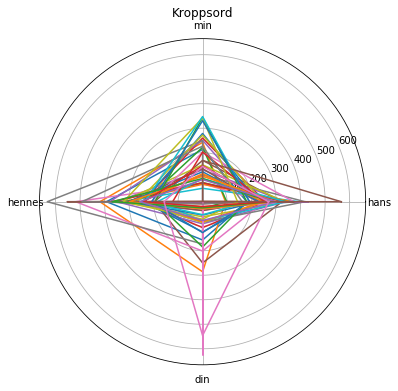

In [358]:
polar_plot_diagram(newframe[['hans','min','hennes','din']], newframe.index)